## Defensive & Receiving position Heatmap

### Imports

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import json
import os

### Read and clean the data

In [337]:
path_to_json = r'C:\Users\al.eriksson\Documents\Python\Football\allsvenskan2021' 

json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [338]:
# Collect all matches from directory in a dataframe
all_matches = []

for i in list(range(0,len(json_files))):
  dir = r'C:\Users\al.eriksson\Documents\Python\Football\allsvenskan2021' 
  f = open (dir + '/' + json_files[i])  
  matches = json.loads(f.read()) 
  matches = pd.DataFrame(matches['events']) 
  all_matches.append(matches)
   

all_matches_df = pd.concat(all_matches)

In [339]:
# Coordinate normalization
# all_matches_df['ypos'] = all_matches_df['ypos'] / 100 * 68
# all_matches_df['xpos'] = all_matches_df['xpos'] / 100 * 105

# Choose the player to look at

In [340]:
player = 'Magnus Eriksson'

# Defensive heatmap preparation

In [341]:
# Create the defensive heatmap df
def_players = all_matches_df[all_matches_df['action'].isin(['Interception successful','Interception unsuccessful','Tackle successful','Tackle unsuccessful','Challenge successful','Challenge unsuccessful','Clearance accurate','Clearance inaccurate','Block successful','Block unsuccessful'])]
# def_players

In [342]:
def_player_data = def_players[def_players['player'] == player]
# def_player_data

In [343]:
# Defensive heatmap actions

# Create a copy of def_player_data to avoid modifying the original DataFrame
def_data = def_player_data.copy()

# A list comprehension that creates a new list "x_" that includes all the 'xpos' values, similar for "y_"
x_ = [x['xpos'] for _, x in def_data.iterrows()]
y_ = [y['ypos'] for _, y in def_data.iterrows()]

# Switch the values in 'ypos' and 'xpos' columns to fit the vertical pitch setup
def_data['ypos'] = x_
def_data['xpos'] = y_

In [344]:
# def_data

# Receiving heatmap preparation

In [345]:
# Create the receiving heatmap df
rec_player = all_matches_df[all_matches_df['next_player'] == player]

In [346]:
# Receiving position heatmap

# Create a copy of rec_player to avoid modifying the original DataFrame
rec_data = rec_player.copy()

# A list comprehension that creates a new list "x_" that includes all the 'xpos' values, similar for "y_"
x_ = [x['xdest'] for _, x in rec_data.iterrows()]
y_ = [y['ydest'] for _, y in rec_data.iterrows()]

# Switch the values in 'ypos' and 'xpos' columns to fit the vertical pitch setup
rec_data['ydest'] = x_
rec_data['xdest'] = y_

In [347]:
# rec_data

# Heatmap colors

In [348]:
colors = [
    '#1b2429',
    '#1b2429',
    '#1b2429',
    '#1b2429',
    '#1b2429',
    '#1b2429',
    '#232e35',
    '#2b3941',
    '#32434c',
    '#3a4e58',
    '#425864',
    '#4a6270',
    '#526d7c',
    '#597788',
    #'#530131',
    #'#66013c',
    '#618193',
    '#58849c',
    '#4e86a6',
    '#4589af',
    '#3b8cb9',
    '#328ec2',
    '#2991cb',
    '#1f93d5',
    '#1696de',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

# Create the figure and two axes + plot the action

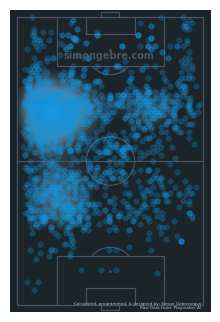

In [349]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    #pitch_color='#E3C25B',
    goal_type='box',
    linewidth=.85,
    pitch_color='#1b2429',
    line_color='#495464',
    half=False
)
pitch.draw(ax = ax)

pitch.kdeplot(
    rec_data.ydest, rec_data.xdest, 
    ax=ax, shade=True, 
    levels=100, shade_lowest=True,
    cut=4, zorder=-1, cmap='SOC')

ax.scatter(rec_data.xdest, rec_data.ydest, s=10, alpha=0.2, lw=1.5, color='#1696de')

ax.text(0.72, 0.83, 'simongebre.com', transform=ax.transAxes, fontsize=7, fontweight='bold', ha='right', va='bottom', color ="#495464")
#ax.text(0.95, 0.10, 'Twitter: gebreee', transform=ax.transAxes, fontsize=3, ha='right', va='bottom', color ="#BBBFCA")
#ax.text(0.95, 0.08, 'Instagram: swe.scout', transform=ax.transAxes, fontsize=3, ha='right', va='bottom', color ="#BBBFCA")
ax.text(0.95, 0.020, 'Calculated, programmed, & designed by: Simon Gebrenegus', transform=ax.transAxes, fontsize=3, ha='right', va='bottom', color ="#BBBFCA")
ax.text(0.95, 0.005, 'Raw Data from: Playmaker AI', transform=ax.transAxes, fontsize=3, ha='right', va='bottom', color ="#BBBFCA")


plt.savefig(
    r'C:\Users\al.eriksson\Documents\Python\Football\PassMap.jpg',
	dpi = 600,
	facecolor = "#1b2429",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

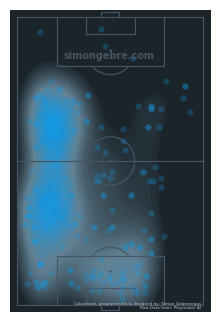

In [350]:

fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    #pitch_color='#E3C25B',
    goal_type='box',
    linewidth=.85,
    pitch_color='#1b2429',
    line_color='#495464',
    half=False
)
pitch.draw(ax = ax)

pitch.kdeplot(
    def_data.ypos, def_data.xpos, 
    ax=ax, shade=True, 
    levels=100, shade_lowest=True,
    cut=4, zorder=-1, cmap='SOC')

ax.scatter(def_data.xpos, def_data.ypos, s=10, alpha=0.2, lw=1.5, color='#1696de')

ax.text(0.72, 0.83, 'simongebre.com', transform=ax.transAxes, fontsize=7, fontweight='bold', ha='right', va='bottom', color ="#495464")
#ax.text(0.95, 0.10, 'Twitter: gebreee', transform=ax.transAxes, fontsize=3, ha='right', va='bottom', color ="#BBBFCA")
#ax.text(0.95, 0.08, 'Instagram: swe.scout', transform=ax.transAxes, fontsize=3, ha='right', va='bottom', color ="#BBBFCA")
ax.text(0.95, 0.020, 'Calculated, programmed, & designed by: Simon Gebrenegus', transform=ax.transAxes, fontsize=3, ha='right', va='bottom', color ="#BBBFCA")
ax.text(0.95, 0.005, 'Raw Data from: Playmaker AI', transform=ax.transAxes, fontsize=3, ha='right', va='bottom', color ="#BBBFCA")


plt.savefig(
    r'C:\Users\al.eriksson\Documents\Python\Football\PassMap1.jpg',
    dpi = 600,
    facecolor = "#1b2429",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

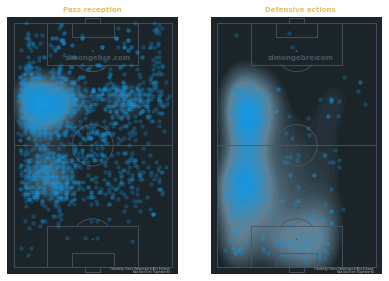

In [392]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

# First Axis
pitch1 = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    pitch_color='#1b2429',
    line_color='#495464',
    half=False
)
pitch1.draw(ax=ax1)

pitch1.kdeplot(
    rec_data.ydest, rec_data.xdest,
    ax=ax1, shade=True,
    levels=100, shade_lowest=True,
    cut=4, zorder=-1, cmap='SOC'
)

ax1.scatter(rec_data.xdest, rec_data.ydest, s=10, alpha=0.2, lw=1.5, color='#1696de')

ax1.text(0.67, 1.015, 'Pass reception', transform=ax1.transAxes, fontsize=7, fontweight='bold', ha='right', va='bottom', color ="#E3C25B")
ax1.text(0.72, 0.83, 'simongebre.com', transform=ax1.transAxes, fontsize=7, fontweight='bold', ha='right', va='bottom', color="#495464")
ax1.text(0.95, 0.012, 'Created by: Simon Gebrenegus & Alex Eriksson', transform=ax1.transAxes, fontsize=2.5, ha='right', va='bottom', color="#BBBFCA")
ax1.text(0.95, 0.00000001, 'Raw Data from: Playmaker AI', transform=ax1.transAxes, fontsize=2.5, ha='right', va='bottom', color="#BBBFCA")

# Second Axis
pitch2 = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    pitch_color='#1b2429',
    line_color='#495464',
    half=False
)
pitch2.draw(ax=ax2)

pitch2.kdeplot(
    def_data.ypos, def_data.xpos,
    ax=ax2, shade=True,
    levels=100, shade_lowest=True,
    cut=4, zorder=-1, cmap='SOC'
)

ax2.scatter(def_data.xpos, def_data.ypos, s=10, alpha=0.2, lw=1.5, color='#1696de')

ax2.text(0.73, 1.015, 'Defensive actions', transform=ax2.transAxes, fontsize=7, fontweight='bold', ha='right', va='bottom', color ="#E3C25B")
ax2.text(0.72, 0.83, 'simongebre.com', transform=ax2.transAxes, fontsize=7, fontweight='bold', ha='right', va='bottom', color="#495464")
ax2.text(0.95, 0.012, 'Created by: Simon Gebrenegus & Alex Eriksson', transform=ax2.transAxes, fontsize=2.5, ha='right', va='bottom', color="#BBBFCA")
ax2.text(0.95, 0.00000001, 'Raw Data from: Playmaker AI', transform=ax2.transAxes, fontsize=2.5, ha='right', va='bottom', color="#BBBFCA")

# Adjust spacing between subplots
plt.tight_layout(w_pad=0.5, h_pad=0.5)

# Save the figure
plt.savefig(
    r'C:\Users\al.eriksson\Documents\Python\Football\PassMap.jpg',
    dpi=600,
    facecolor="#1b2429",
    bbox_inches="tight",
    edgecolor="none",
    transparent=False
)